In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
df= pd.read_excel('cancer.xlsx',index_col='S.No')

In [3]:
df.head(5)

,Patients Name,Father's/Husbands Name,Age,Sex,Sex Corr,Benign,Borderline,Malignant,Form of cancer,Cancer Form Corr,Type of Cancer,Location,Immuno-Pathology\nstudy
S.No,,,,,,,,,,,,,
1,Parvinder Singh,Darshan Singh,34.0,Male,0,NaN,NaN,NaN,Malignant,2,Bone Cancer,Jaw Bone,Ameloblastoma
2,Harbans Singh,Logar Singh,62.0,Male,0,P,NaN,NaN,Benign,0,Brain and Central Nervous System Cancer,Cerebral Hemisphere,GBM
3,Darshan Singh,Arjan Singh,66.0,Male,0,P,NaN,NaN,Benign,0,Genetourinary system,NaN,Transitional Cell Carcinoma
4,Gurdeep Singh,Jaga Singh,48.0,Male,0,NaN,NaN,P,Malignant,2,Skin Cancer,Nose,Basal cell carcinoma
5,Sharto Bai,NaN,66.0,Female,1,P,NaN,NaN,Benign,0,Female Reproductive Cancer,Cervix,Squamous Cell Carcinoma


In [4]:
df.columns

Index(['Patients Name', 'Father's/Husbands Name', 'Age', 'Sex', 'Sex  Corr',
       'Benign', 'Borderline', 'Malignant', 'Form of cancer',
       'Cancer Form Corr', 'Type of Cancer', 'Location',
       'Immuno-Pathology\nstudy'],
      dtype='object')

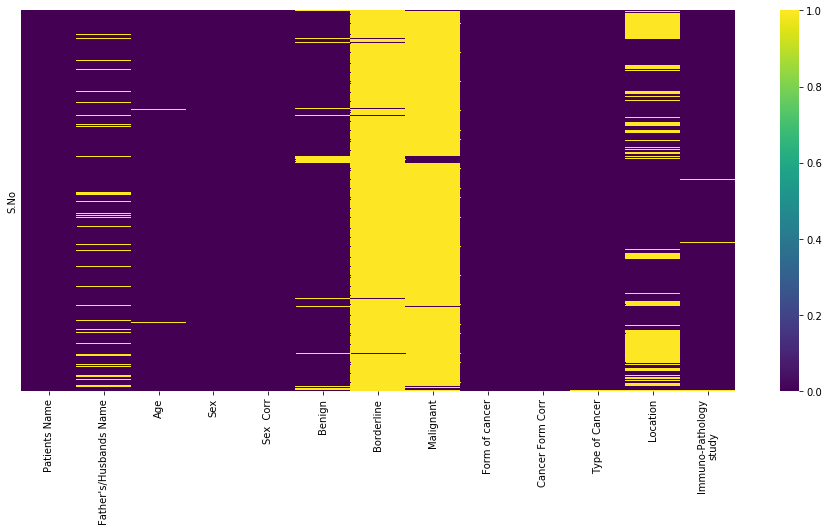

In [5]:
blnk=df.isnull()
plt.figure(figsize=(16,7))
sns.heatmap(blnk,yticklabels=False, cmap='viridis')

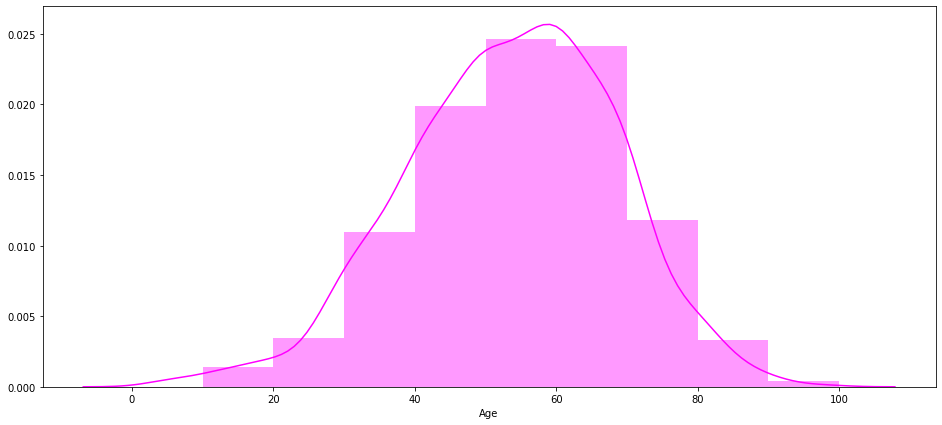

In [6]:

plt.figure(figsize=(16,7))
sns.distplot(df.Age,color='magenta',rug=False,bins=[10,20,30,40,50,60,70,80,90,100])

Text(0.5, 1.0, 'Genderwise Cases')

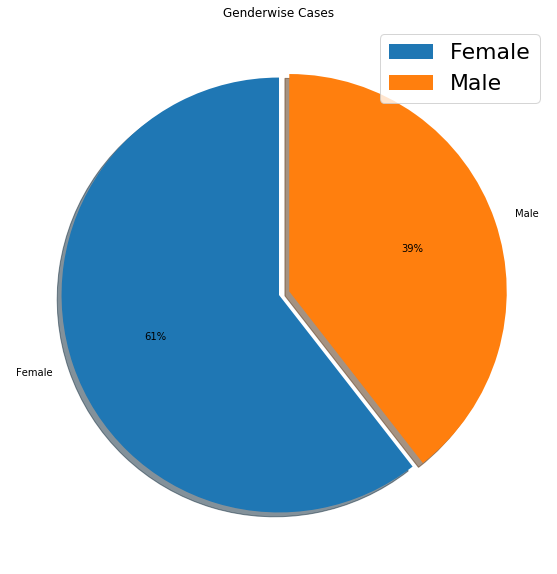

In [42]:
plt.figure(figsize=(10,10))
df['Sex'].value_counts()
plt.pie(df['Sex'].value_counts(),labels=['Female','Male'],shadow=True,explode=[0,0.05],autopct='%1.f%%',startangle=90)
plt.legend(loc='upper right',fontsize=22)
df['Sex'].value_counts()
plt.title("Genderwise Cases")

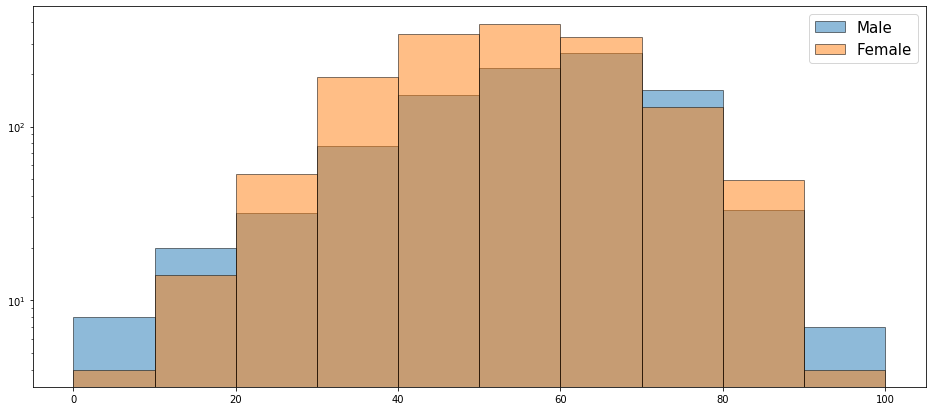

In [7]:
plt.figure(figsize=(16,7))
#plt.hist(df.Age,bins=[10,20,30,40,50,60,70,80,90,100],edgecolor='k',log=True,label='Total Population')
male=df[df['Sex']=='Male']
female=df[df['Sex']=='Female']
plt.hist(male.Age,bins=[0,10,20,30,40,50,60,70,80,90,100],edgecolor='k',log=True,alpha=0.5,label='Male')
plt.hist(female.Age,bins=[0,10,20,30,40,50,60,70,80,90,100],edgecolor='k',log=True,alpha=0.5,label='Female')
plt.legend(fontsize=15,loc='best')



Text(0.5, 1.0, 'Stage of Cancer Distribution')

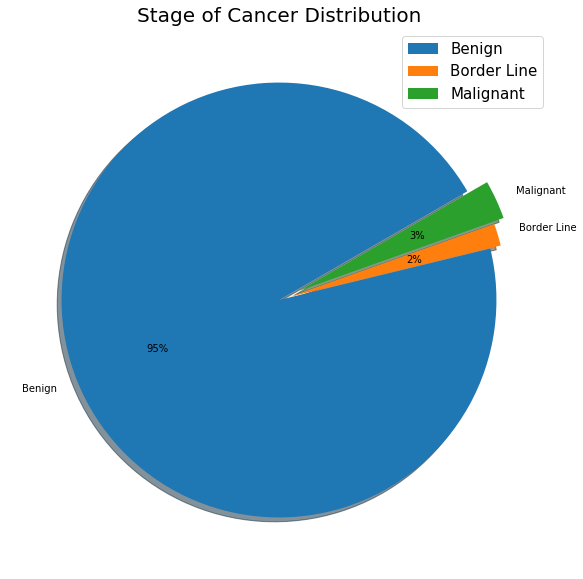

In [44]:

plt.figure(figsize=(10,10))
benign = df['Benign'].count()
borderline =df['Borderline'].count()
malignant = df['Malignant'].count()
plt.pie([benign,borderline,malignant],labels=['Benign','Border Line','Malignant'],shadow=True,explode=[0,0.05,0.1],autopct='%1.f%%',startangle=390)
plt.legend(loc='upper right',fontsize=15)
df['Sex'].value_counts()
plt.title("Stage of Cancer Distribution", Fontsize=20)


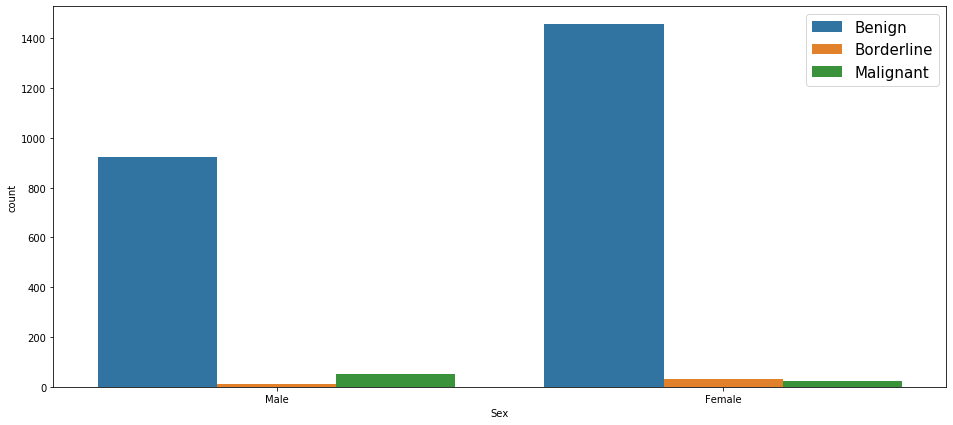

In [8]:
fcnt=df['Form of cancer'].value_counts()
Sum=df['Form of cancer'].count
plt.figure(figsize=(16,7))
sns.countplot('Sex',data=df,hue='Form of cancer',hue_order=['Benign','Borderline','Malignant'])
plt.legend(fontsize=15)

In [9]:
fcnt=df['Form of cancer'].value_counts()

Text(0.5, 1.0, 'Stage of Cancer Distribution in Male')

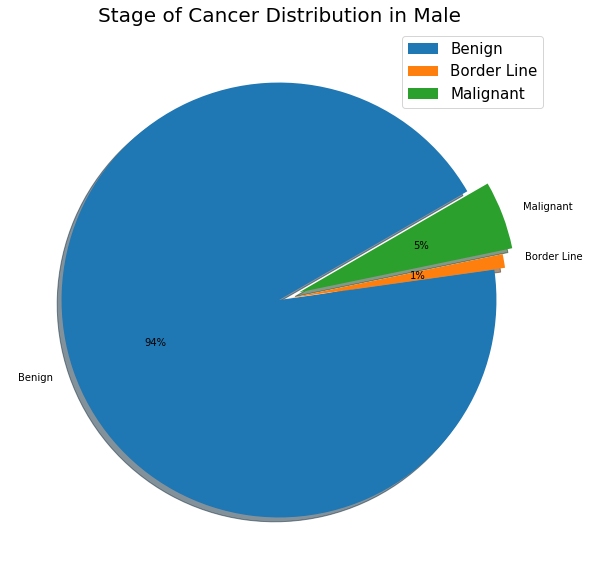

In [45]:
plt.figure(figsize=(10,10))
male_k=df['Sex']=='Male'
benign_m = df.loc[male_k,'Benign'].count()
borderline_m =df.loc[male_k,'Borderline'].count()
malignant_m = df.loc[male_k,'Malignant'].count()
plt.pie([benign_m,borderline_m,malignant_m],labels=['Benign','Border Line','Malignant'],shadow=True,explode=[0,0.05,0.1],autopct='%1.f%%',startangle=390)
plt.legend(loc='upper right',fontsize=15)
plt.title("Stage of Cancer Distribution in Male", Fontsize=20)

Text(0.5, 1.0, 'Stage of Cancer Distribution in Female')

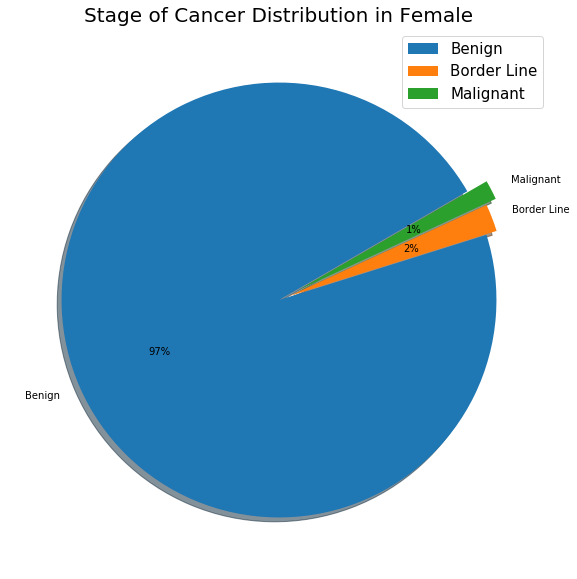

In [46]:
plt.figure(figsize=(10,10))
female_k=df['Sex']=='Female'
benign_f = df.loc[female_k,'Benign'].count()+10
borderline_f =df.loc[female_k,'Borderline'].count()
malignant_f = df.loc[female_k,'Malignant'].count()
plt.pie([benign_f,borderline_f,malignant_f],labels=['Benign','Border Line','Malignant'],shadow=True,explode=[0,0.05,0.1],autopct='%1.f%%',startangle=390)
plt.legend(loc='upper right',fontsize=15)
plt.title("Stage of Cancer Distribution in Female", Fontsize=20)

<Figure size 1440x504 with 0 Axes>

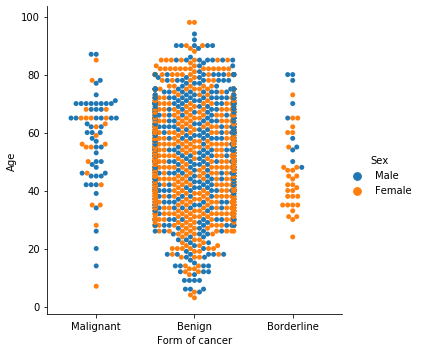

In [49]:
plt.figure(figsize=(20,7))
sns.catplot('Form of cancer','Age',data=df,hue='Sex',estimator=None, kind='swarm')

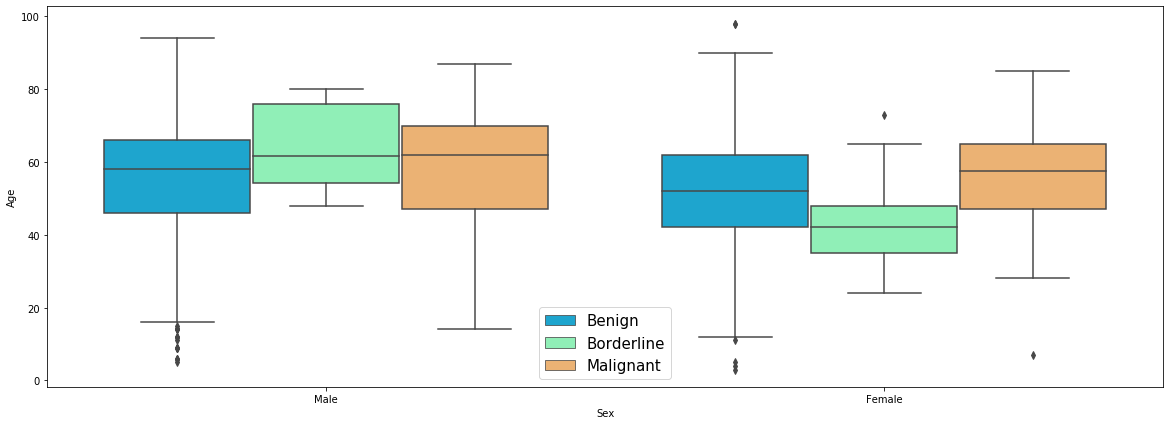

In [10]:
plt.figure(figsize=(20,7))
sns.boxplot('Sex','Age',data=df,hue='Form of cancer',hue_order=['Benign','Borderline','Malignant'],palette='rainbow')
plt.legend(fontsize=15,loc='best')

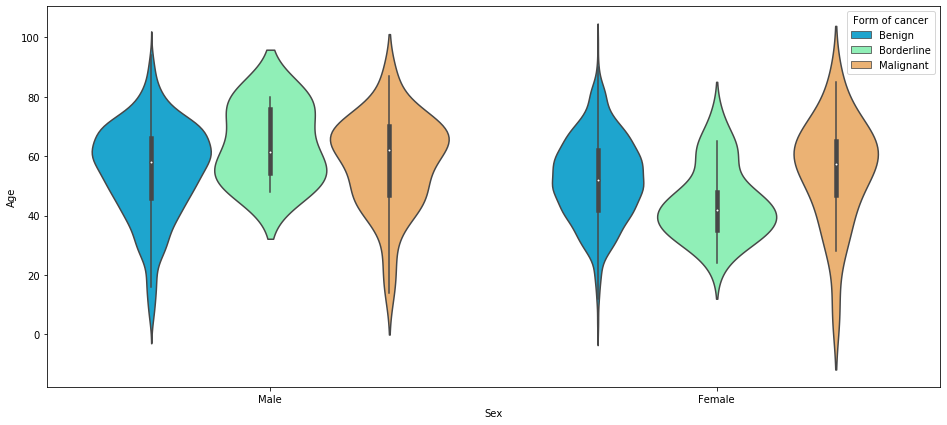

In [11]:
plt.figure(figsize=(16,7))
sns.violinplot('Sex','Age',data=df,hue='Form of cancer',hue_order=['Benign','Borderline','Malignant'],palette='rainbow')

In [15]:
df.corr()

,Age,Sex Corr,Cancer Form Corr
Age,1.000000,-0.108936,0.024575
Sex Corr,-0.108936,1.000000,-0.087618
Cancer Form Corr,0.024575,-0.087618,1.000000


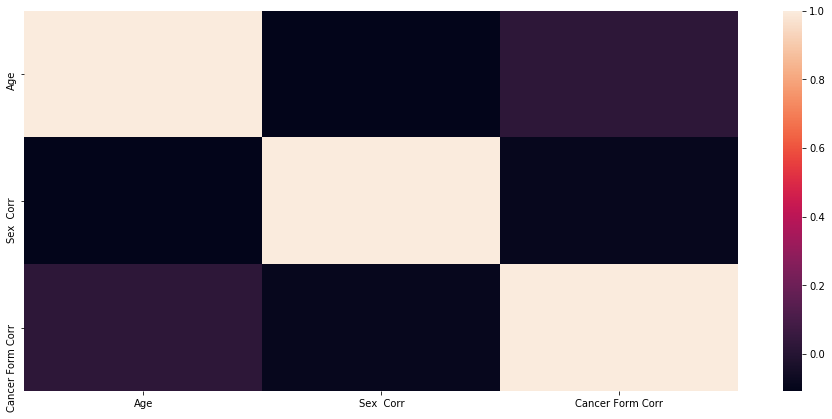

In [34]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr())

In [32]:
df.dtypes

Patients Name               object
Father's/Husbands Name      object
Age                        float64
Sex                         object
Sex  Corr                    int64
Benign                      object
Borderline                  object
Malignant                   object
Form of cancer              object
Cancer Form Corr             int64
Type of Cancer              object
Location                    object
Immuno-Pathology\nstudy     object
dtype: object

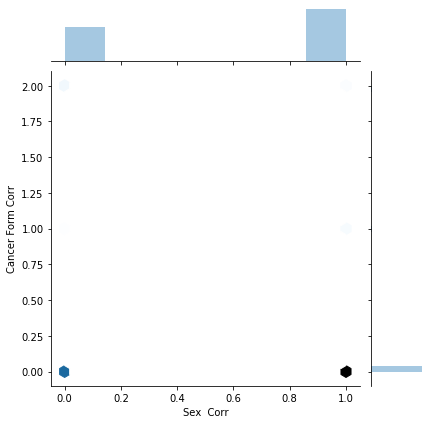

In [37]:
sns.jointplot(x='Sex Corr',y='Cancer Form Corr',data=df,kind='hex')

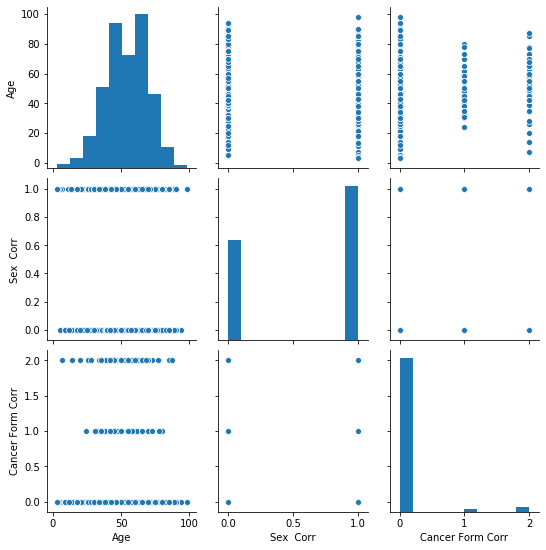

In [41]:
sns.pairplot(df)

Text(0.5, 1.0, 'Type of Cancer Share')

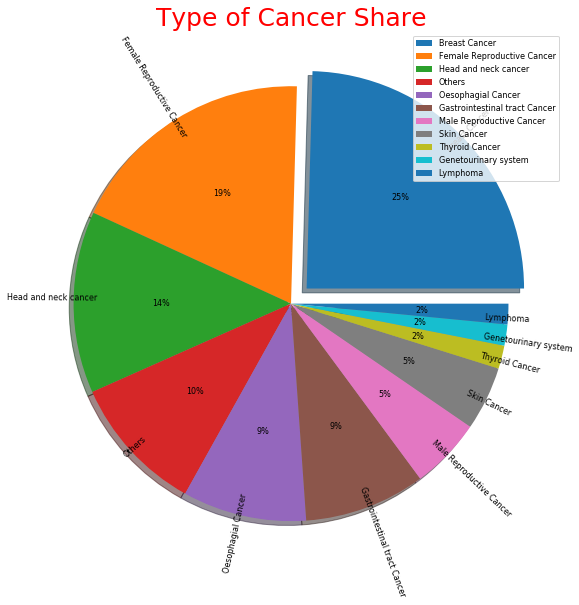

In [50]:
type_of_cancer=df['Type of Cancer'].value_counts().sort_values()
type_of_cancer
others=0
for item in type_of_cancer:
    if item<27:
        others= item +others
type(others)
obj = pd.Series(others)
obj.index=["Others"]
type_of_cancer = type_of_cancer.append(pd.Series(obj))
type_of_cancer_top = type_of_cancer.sort_values(ascending=False).nlargest(11)
type_of_cancer_top
exp= np.zeros(11)
exp[0]=0.1
type_of_cancer_top.plot.pie(figsize=(10,10),autopct='%1.f%%',explode=exp,shadow=True,rotatelabels = 270,fontsize=8,labeldistance=0.89)
plt.legend(fontsize=8,loc='best')
plt.ylabel("")
plt.title('Type of Cancer Share',Fontsize=25,color='r')

Text(0.5, 1.0, 'Other Type of Cancer Share')

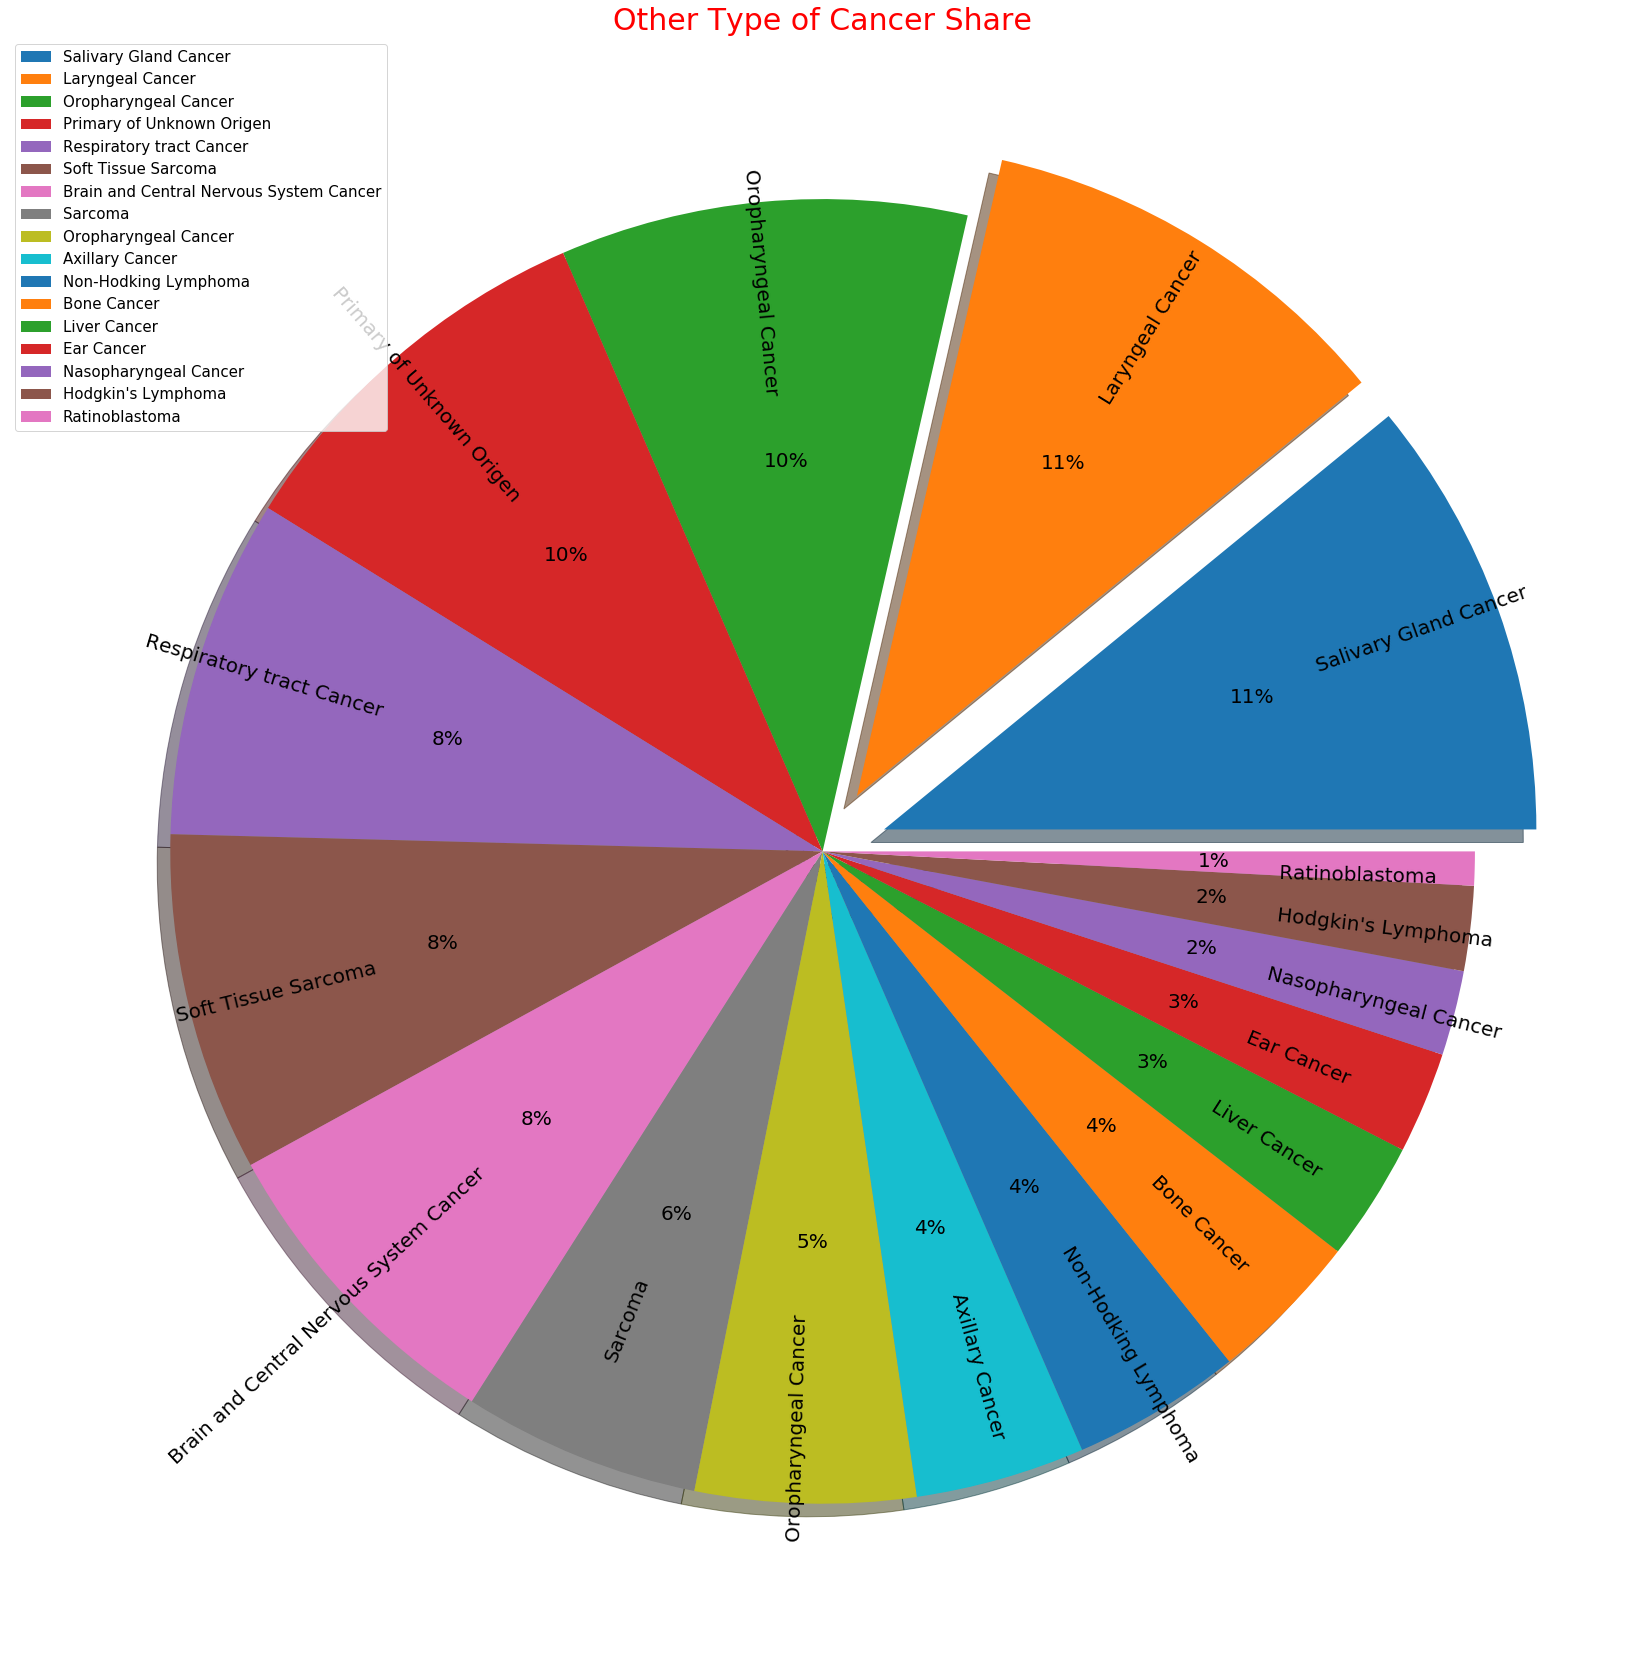

In [51]:
oth = type_of_cancer.sort_values(ascending=False)[11:28]
exp= np.zeros(17)
exp[0]=0.1
exp[1]=0.1
oth.plot.pie(figsize=(30,30),autopct='%1.f%%',explode=exp,shadow=True,rotatelabels = 270,fontsize=20,labeldistance=0.7)
plt.legend(fontsize=15,loc='best')
plt.ylabel("")
plt.title('Other Type of Cancer Share',Fontsize=30,color='r')

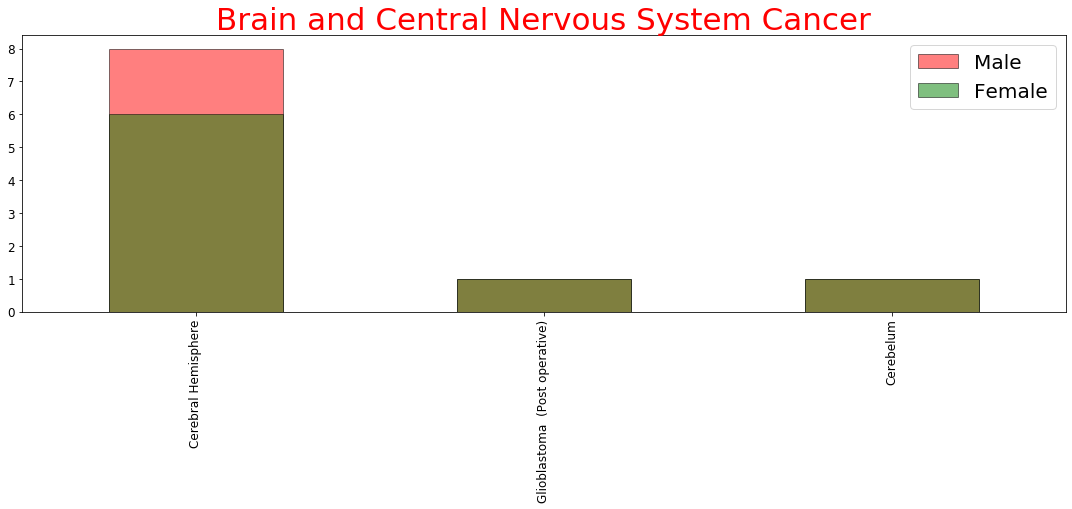

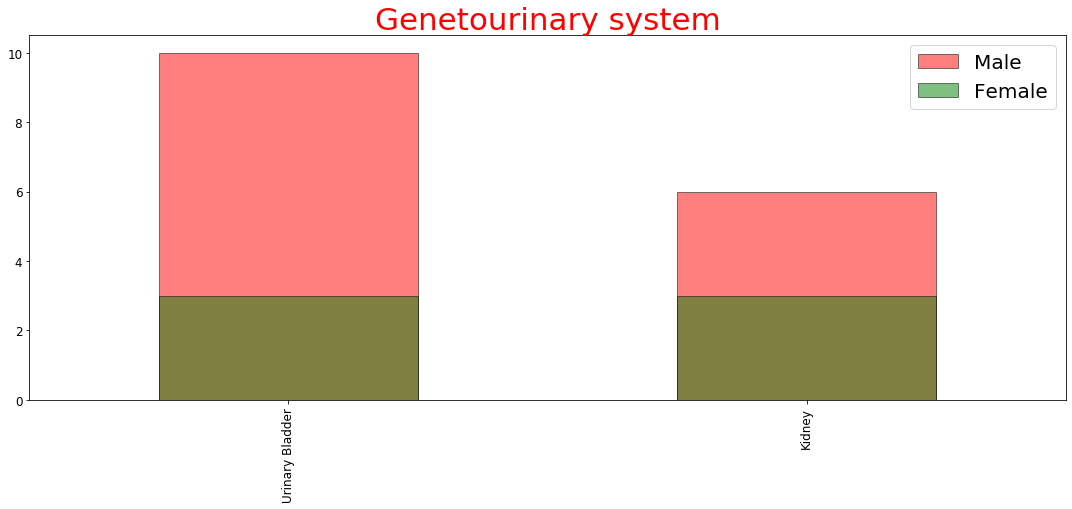

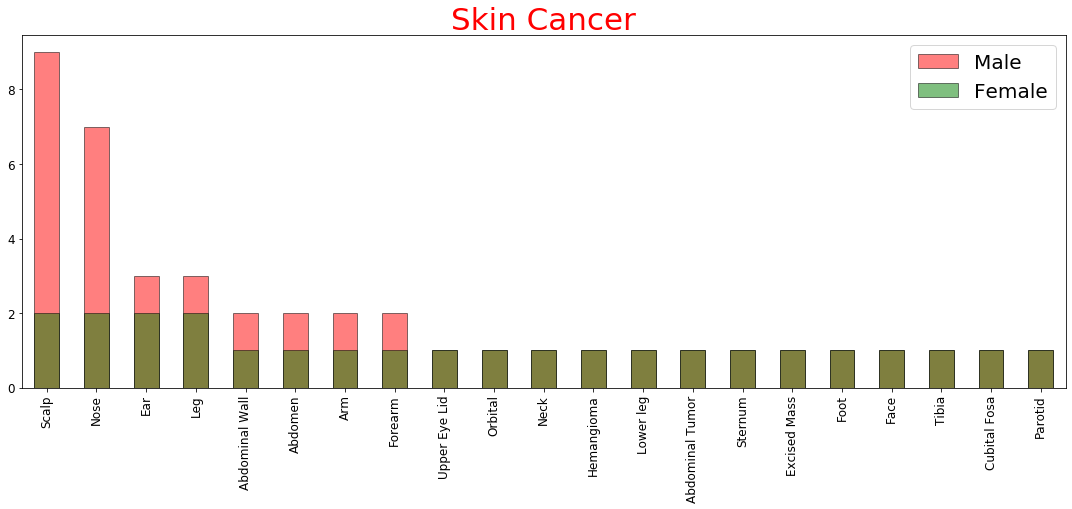

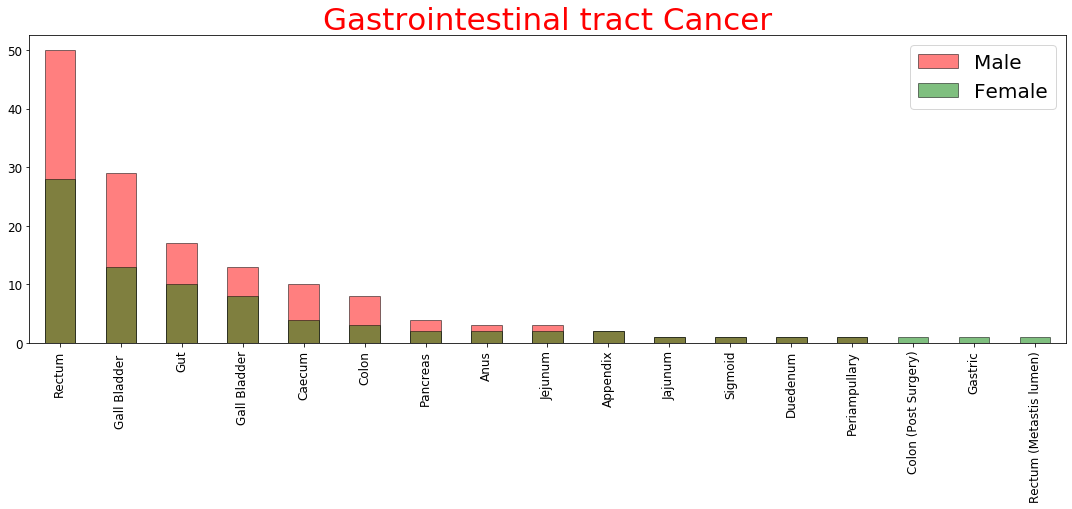

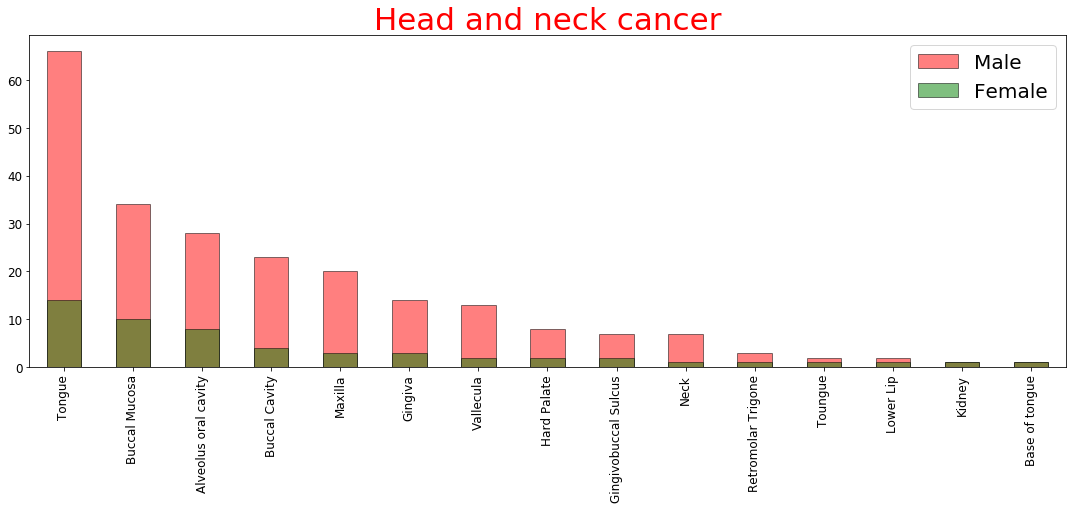

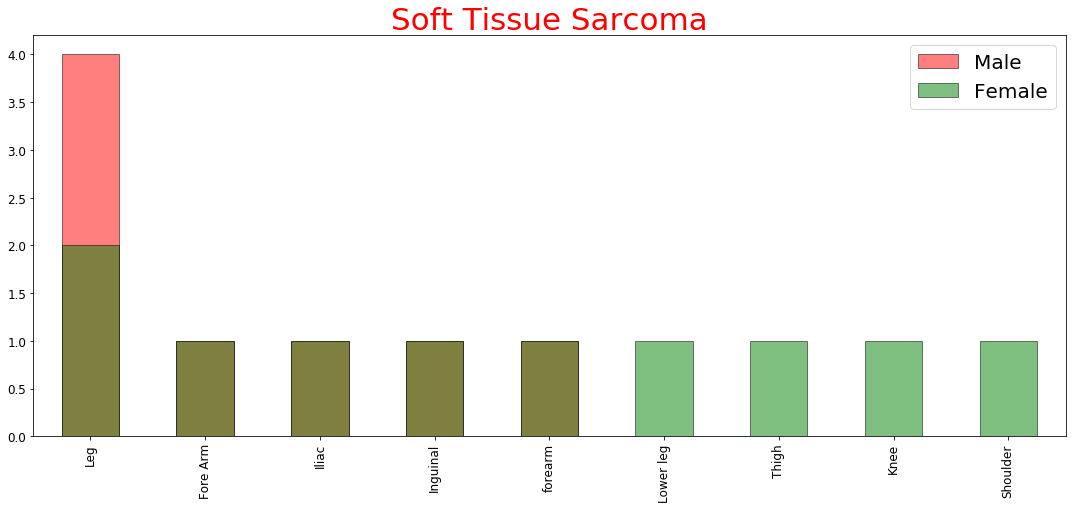

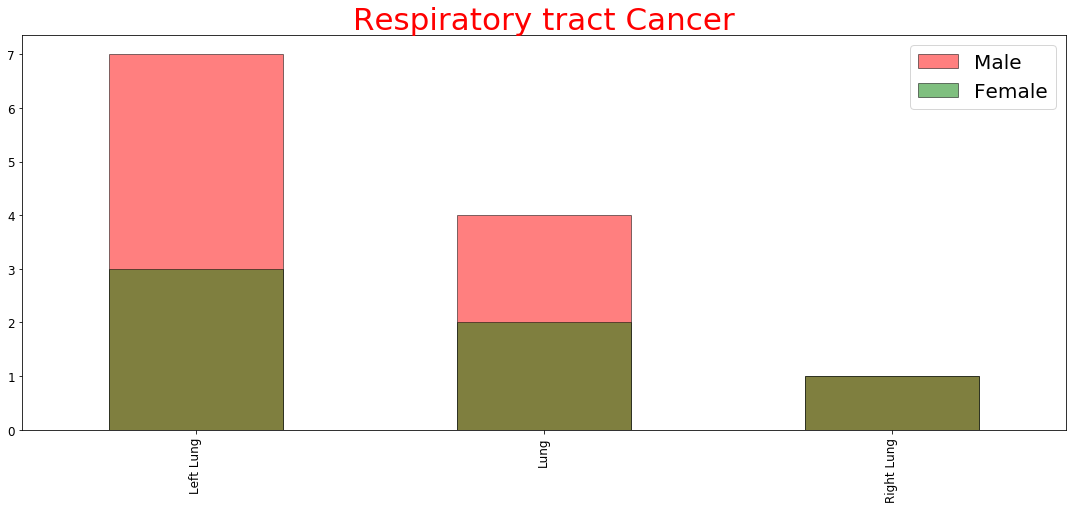

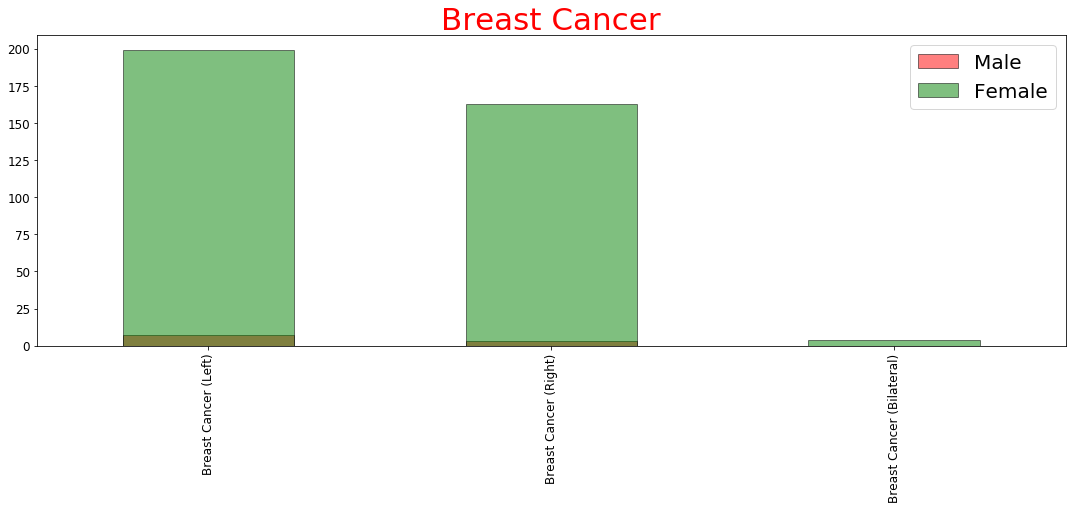

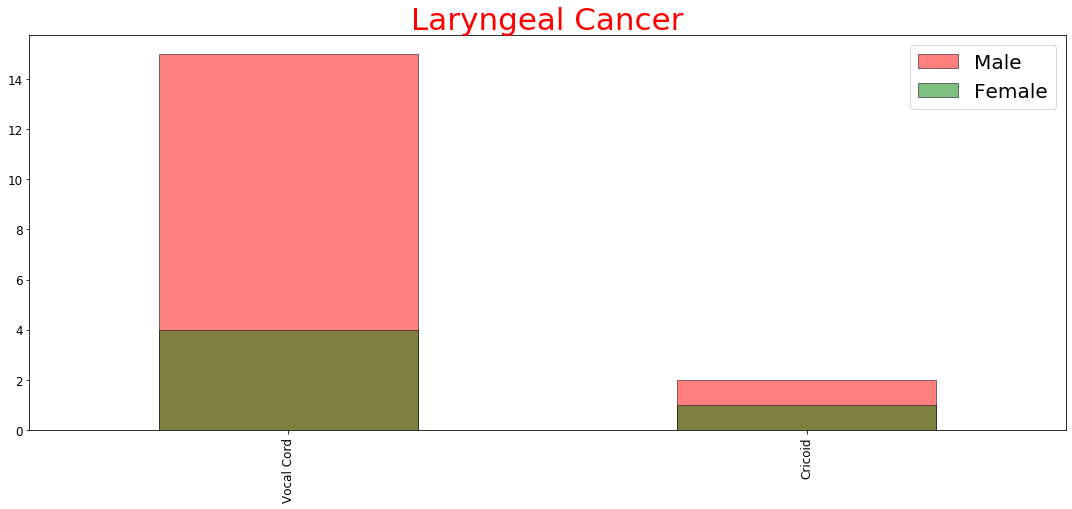

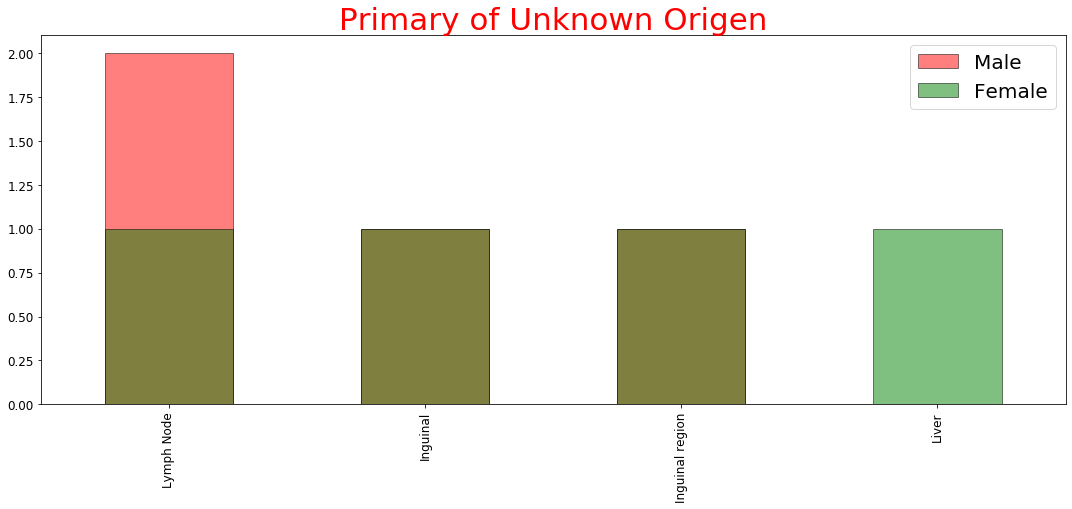

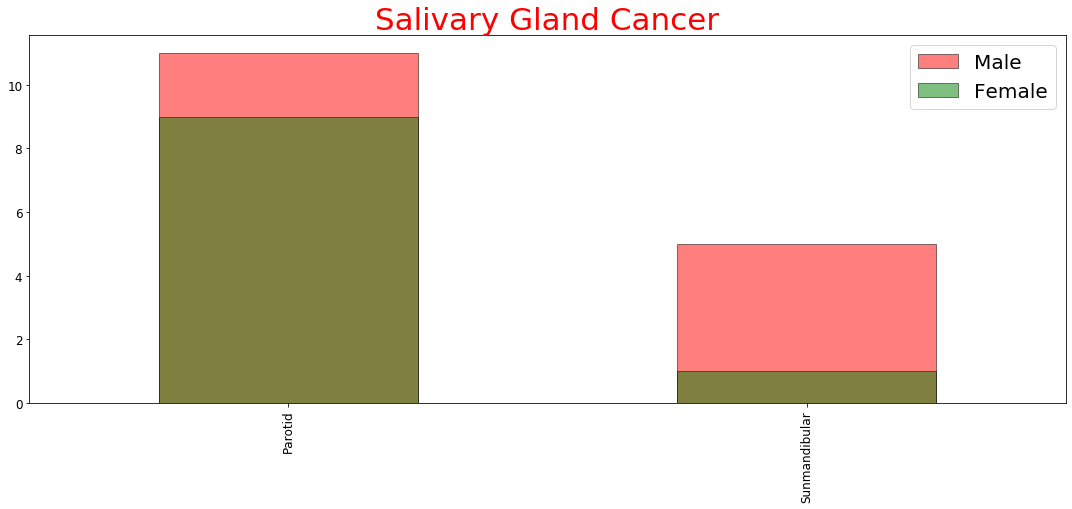

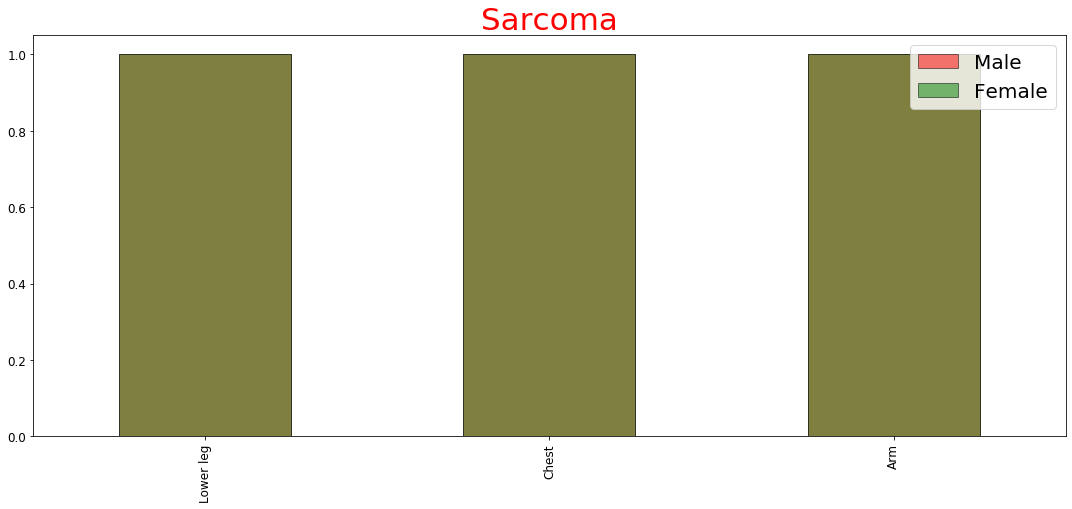

In [52]:
male_t = df[df['Sex']=='Male']
female_t = df[df['Sex']=='Female']
male_t.index=male_t['Type of Cancer']
male_t.index=male_t['Type of Cancer']

for item in df['Type of Cancer'].unique():
    #c=['cyan','torquoise','grey','c','r','pink','maroon','cyan','torquoise','grey','c','r','pink','maroon','cyan','torquoise','grey','c','r']
    if item!='Male Reproductive Cancer':
    
    
        filt1 = male_t['Type of Cancer']==item
        filt2 = female_t['Type of Cancer']==item
        at = male_t.loc[filt1,'Location'].value_counts()

        bt = female_t.loc[filt2,'Location'].value_counts()

        if len(at)>1 and len(bt)>1:
            plt.figure(figsize=(15,7))
    #         #at.plot.pie(autopct='%1.f%%',shadow=True,rotatelabels = 270,labeldistance=0.9,fontsize=15)
            at.plot.bar(subplots=True,edgecolor='black',color='red',fontsize=12,alpha=0.5,label="Male")
            bt.plot.bar(subplots=True,edgecolor='black',color='Green',fontsize=12,alpha=0.5,label="Female")
            plt.legend(fontsize=20)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.title(item,fontsize=31,color='r')
        
        
        
plt.show()